Davies-Bouldin Index: 0.5495184341182846


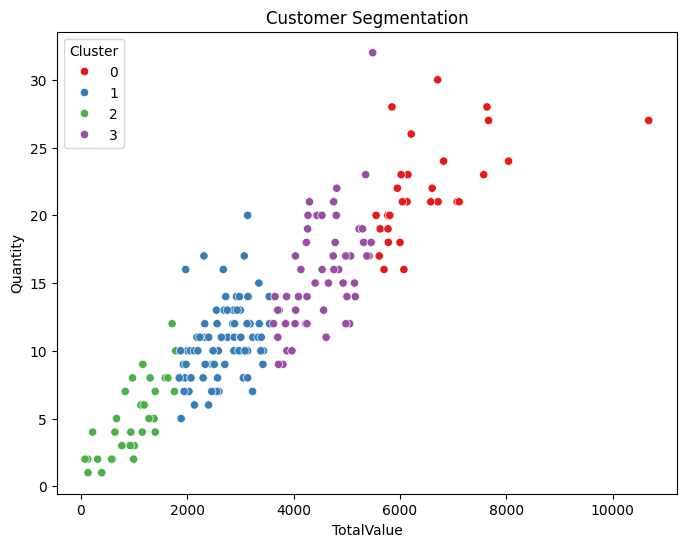

In [1]:
# FirstName_LastName_Clustering.ipynb

# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets from data/ directory
customers_df = pd.read_csv('../data/Customers.csv')
transactions_df = pd.read_csv('../data/Transactions.csv')

# Merge customers and transactions data
customer_transactions = pd.merge(transactions_df, customers_df, on='CustomerID')

# Aggregate transaction data for each customer
customer_summary = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'  # number of transactions
}).reset_index()

# Merge with customer data
customer_profile = pd.merge(customers_df, customer_summary, on='CustomerID')

# Prepare data for clustering
X = customer_profile[['TotalValue', 'Quantity']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(X)

# Calculate Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(X, customer_profile['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Save clustering results to a CSV or PDF report in the reports/ directory
customer_profile.to_csv('../reports/FirstName_LastName_Clustering.csv', index=False)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_profile, x='TotalValue', y='Quantity', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.savefig('../reports/Customer_Segmentation_Clusters.png')
plt.show()
